In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
import pandas as pd

# Definir los nombres de las columnas según la documentación
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# URL del dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Cargar el dataset
df = pd.read_csv(data_url, header=None, names=column_names)

# Mostrar las primeras filas
print(df.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [3]:
# Tamaño del dataset
print("Tamaño del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Valores únicos por columna
print("\nValores únicos por columna:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


Tamaño del dataset: (8124, 23)

Tipos de datos:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Valores nulos por columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color      

In [4]:
# Calcular la cantidad de valores únicos para cada columna
n_values = df.nunique()

# Crear el nuevo DataFrame
df_n_unique = pd.DataFrame({
    'features': n_values.index,
    'n_values': n_values.values
})

# Mostrar las primeras filas
print(df_n_unique.head())


      features  n_values
0        class         2
1    cap-shape         6
2  cap-surface         4
3    cap-color        10
4      bruises         2


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd # Ensure pandas is imported

# Reemplazar '?' por NaN (usando np.nan es más compatible con SimpleImputer)
# df.replace('?', pd.NA, inplace=True) # Replace this line

# Use np.nan instead of pd.NA for better compatibility with scikit-learn imputers
df.replace('?', np.nan, inplace=True)

# Convert object columns to category dtype before imputation
# This helps SimpleImputer treat them correctly
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')


# Separar características y etiqueta
X = df.drop('class', axis=1)
y = df['class']

# Imputar valores faltantes con la moda
imputer = SimpleImputer(strategy='most_frequent')
# X_imputed = imputer.fit_transform(X) # Replace this line

# Fit and transform the imputer on the categorical data
# SimpleImputer can handle categorical data with np.nan missing values
X_imputed = imputer.fit_transform(X)


# Aplicar codificación one-hot
encoder = OneHotEncoder(handle_unknown='ignore') # Add handle_unknown to avoid errors with new categories
X_encoded = encoder.fit_transform(X_imputed)

# Convertir a array denso si es necesario
X_encoded_dense = X_encoded.toarray()

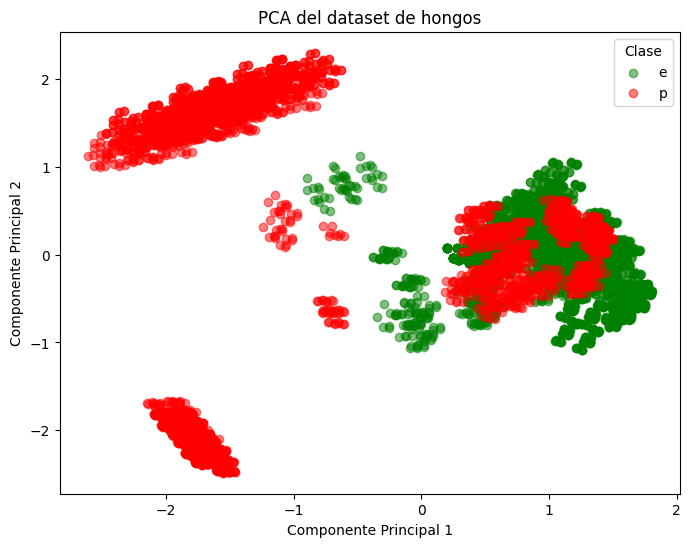

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded_dense)

# Visualizar los datos en el espacio de los primeros dos componentes
plt.figure(figsize=(8,6))
colors = {'e': 'green', 'p': 'red'}
for label in ['e', 'p']:
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        c=colors[label],
        label=label,
        alpha=0.5
    )
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del dataset de hongos')
plt.legend(title='Clase')
plt.show()


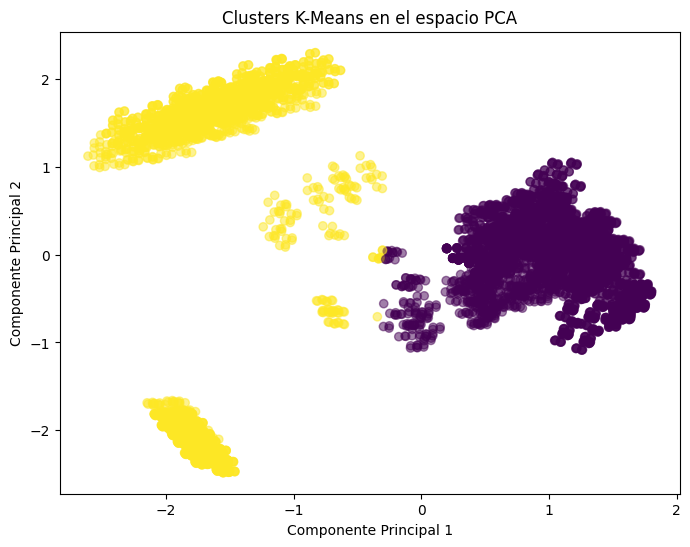

In [7]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters (comestible y venenoso)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualizar los clusters
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap='viridis',
    alpha=0.5
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters K-Means en el espacio PCA')
plt.show()


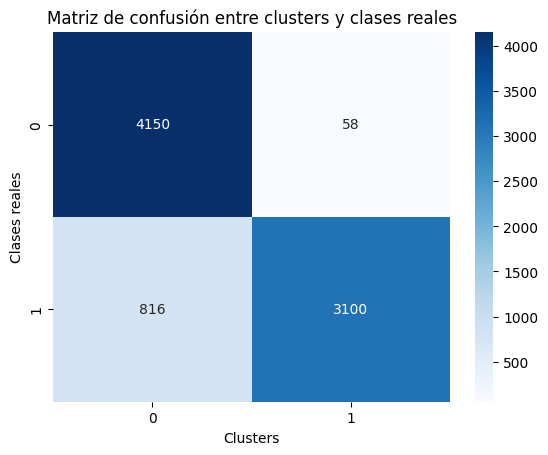

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convertir etiquetas a números
y_numeric = y.map({'e': 0, 'p': 1})

# Generar matriz de confusión
cm = confusion_matrix(y_numeric, clusters)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clusters')
plt.ylabel('Clases reales')
plt.title('Matriz de confusión entre clusters y clases reales')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Reemplazar '?' por NA
df.replace('?', pd.NA, inplace=True)

# Separar variables y objetivo
X = df.drop('class', axis=1)
y = df['class']

# Imputar valores faltantes con la moda
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# One-Hot Encoding para todas las variables categóricas
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_imputed)

# Convertir etiquetas 'e' y 'p' a valores numéricos
y_binary = y.map({'e': 0, 'p': 1})  # 0 = comestible, 1 = venenoso


In [10]:
# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_binary, test_size=0.2, random_state=42
)


In [11]:
# Inicializar y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predicciones
y_pred = rf_model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

